<a href="https://www.kaggle.com/code/kongkityeesai/pre-trained-5-models?scriptVersionId=221787767" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


In [2]:
import os
print(os.listdir("../input"))

import zipfile

with zipfile.ZipFile("/kaggle/input/dogs-vs-cats/test1.zip","r") as z:
    z.extractall(".")
    
with zipfile.ZipFile("/kaggle/input/dogs-vs-cats/train.zip","r") as z:
    z.extractall(".")

['dogs-vs-cats']


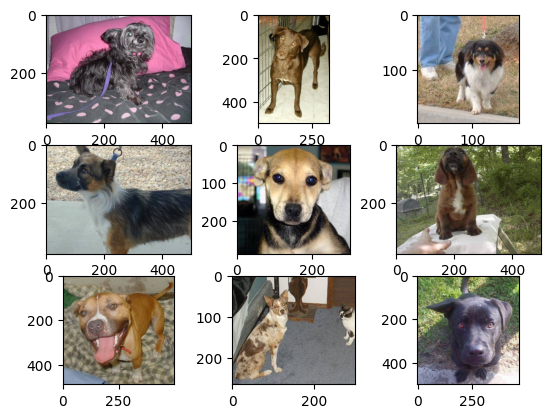

In [3]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

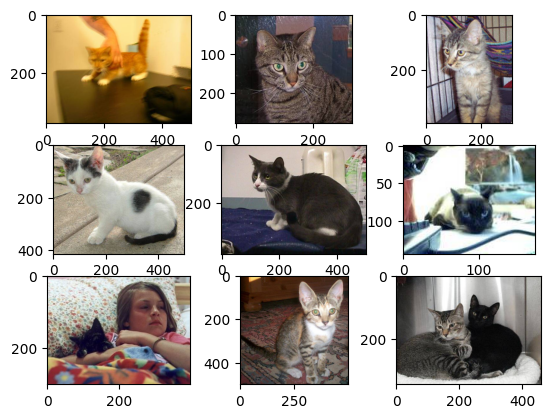

In [4]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [5]:
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


In [6]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

In [7]:
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)

In [8]:
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

In [9]:
!ls -l dataset_dogs_vs_cats/train/dogs | wc -l


9374


In [10]:
!ls -l dataset_dogs_vs_cats/train/cats | wc -l



9325


In [11]:
!pip -q install livelossplot


In [12]:
from livelossplot import PlotLossesKeras


**เตรียม data **

In [13]:
# save the final model to file
from keras.applications.vgg16 import VGG16
from keras.applications.xception import Xception
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# create data generator
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# prepare iterator
train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
    class_mode='binary', batch_size=64, target_size=(224, 224))

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


In [15]:
def summarize_diagnostics(history):
    # ตัวอย่างการสร้างกราฟจากประวัติการฝึก
    import matplotlib.pyplot as plt
    
    # Plot training & validation accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


# VGG16

In [16]:
# load model
model = VGG16(
    include_top=False,
    input_shape=(224, 224, 3)
    )
print(model.summary())
#model = Xception(include_top=False, input_shape=(299, 299, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
# mark loaded layers as not trainable
for index, layer in enumerate(model.layers[:15]):
    # ตรวจสอบว่าเลเยอร์มีคุณสมบัติ output_shape ก่อนพิมพ์
    if hasattr(layer, 'output shape'):
        print(index, layer.name, layer.output_shape)
    layer.trainable = False

for index, layer in enumerate(model.layers[15:]):
    # ตรวจสอบว่าเลเยอร์มีคุณสมบัติ output_shape ก่อนพิมพ์
    if hasattr(layer, 'output shape'):
        print(index, layer.name, layer.output_shape)

    layer.trainable = True

In [18]:
model.layers[-1].output


<KerasTensor shape=(None, 7, 7, 512), dtype=float32, sparse=False, name=keras_tensor_18>

In [19]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)  # ใช้ output จากเลเยอร์สุดท้าย
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)  # ReLU และ He initializer
output = Dense(1, activation='sigmoid')(class1)  # Layer สุดท้ายสำหรับ binary classification

# define new model
my_model = Model(inputs=model.inputs, outputs=output)

# compile model
opt = SGD(learning_rate=0.0001, momentum=0.9)  # ใช้ learning_rate แทน lr
my_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# display model summary
my_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 10,290,945 (39.26 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

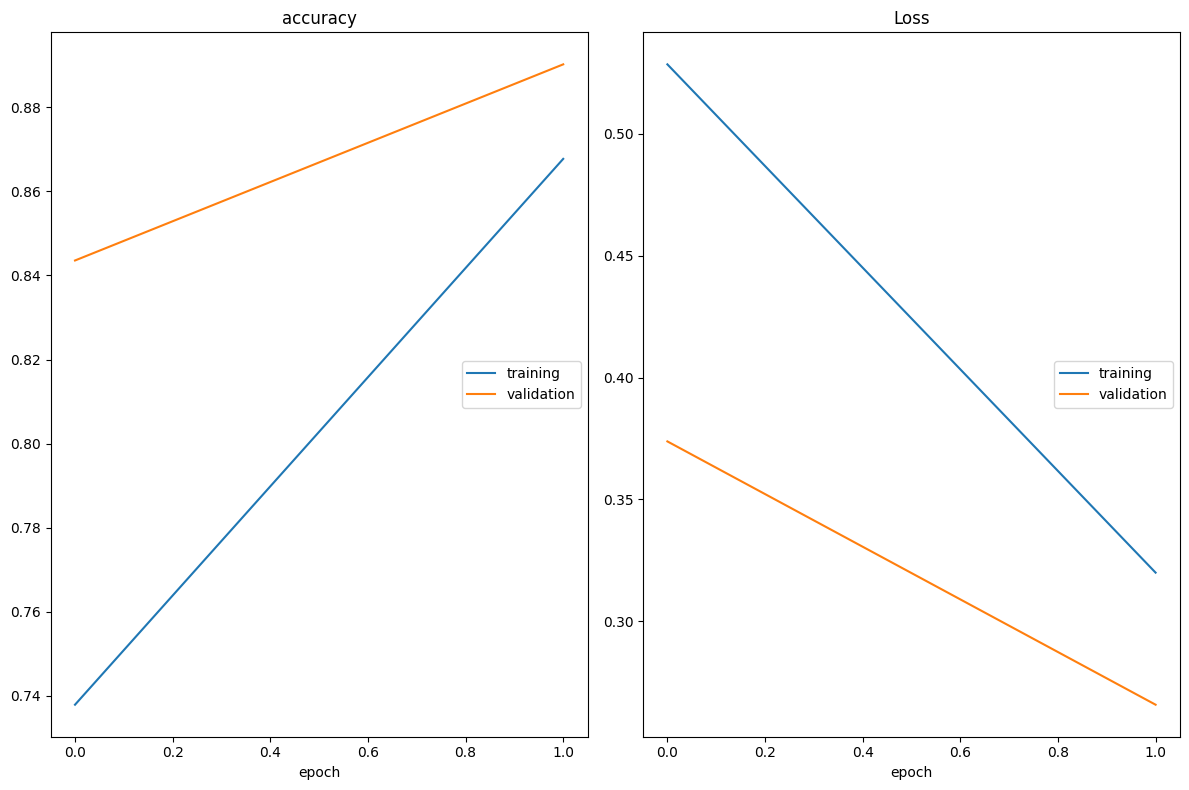

accuracy
	training         	 (min:    0.738, max:    0.868, cur:    0.868)
	validation       	 (min:    0.844, max:    0.890, cur:    0.890)
Loss
	training         	 (min:    0.320, max:    0.528, cur:    0.320)
	validation       	 (min:    0.266, max:    0.374, cur:    0.266)
293/293 ━━━━━━━━━━━━━━━━━━━━ 306s 1s/step - accuracy: 0.8527 - loss: 0.3539 - val_accuracy: 0.8902 - val_loss: 0.2658
99/99 ━━━━━━━━━━━━━━━━━━━━ 76s 764ms/step - accuracy: 0.8907 - loss: 0.2717
> 89.116


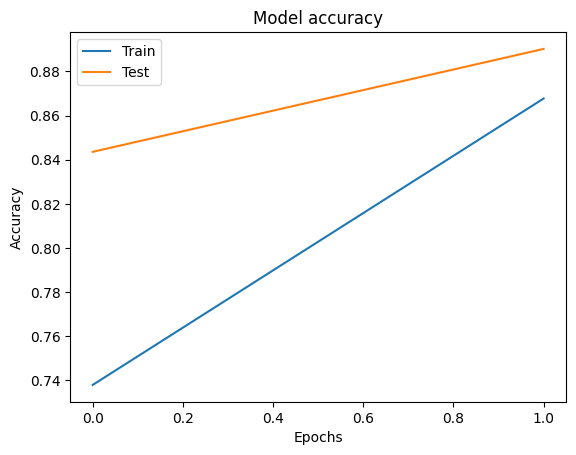

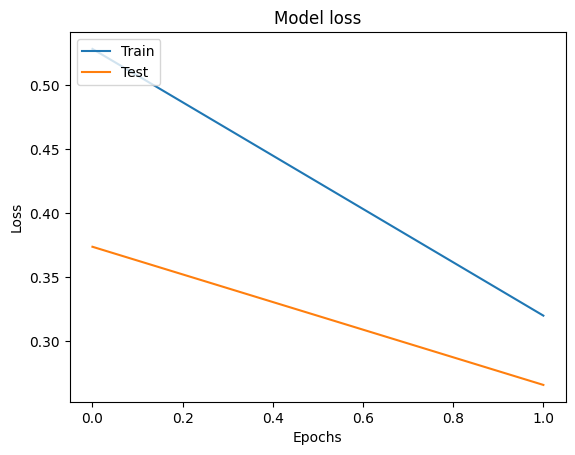

Model saved to vgg16_model.hdf5


In [20]:
# fit model
history = my_model.fit(
    train_it, 
    validation_data=test_it, 
    epochs=2,  # ปรับเป็นจำนวน epochs ที่ต้องการ
    verbose=1,
    callbacks=[PlotLossesKeras()]  # สามารถตัดออกหากไม่ต้องการการแสดงผลกราฟ
)

# evaluate model
_, acc = my_model.evaluate(test_it, verbose=1)  # ใช้ evaluate แทน evaluate_generator
print('> %.3f' % (acc * 100.0))

# learning curves
summarize_diagnostics(history)

# save model
best_model = 'vgg16_model.hdf5'
my_model.save(best_model)
print(f'Model saved to {best_model}')


Found 6303 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


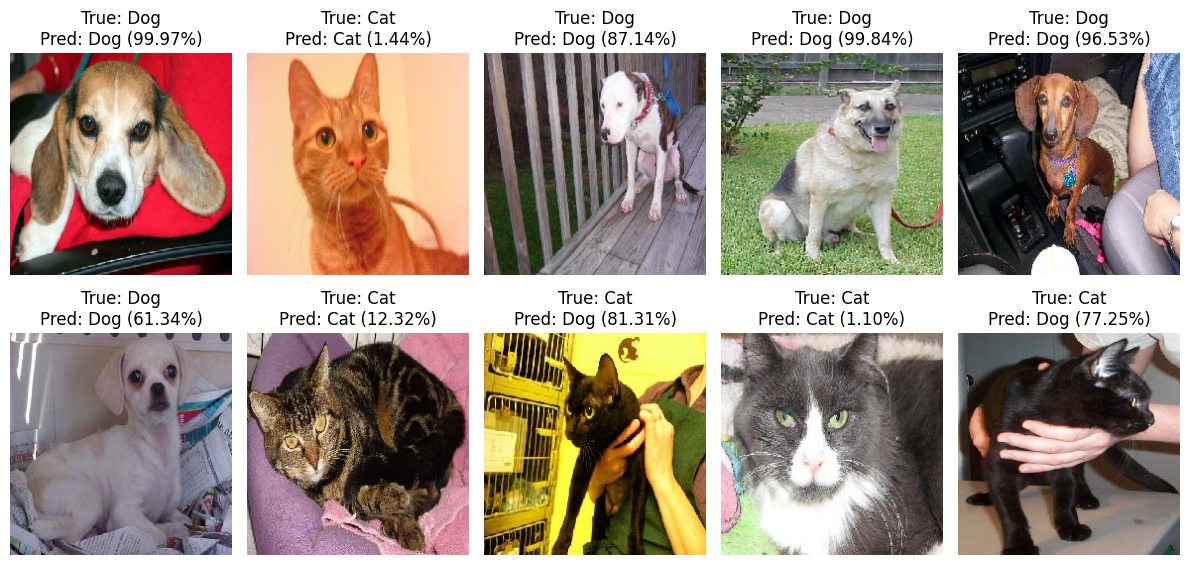

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# โหลดโมเดลที่เทรนเสร็จแล้ว
model = load_model('vgg16_model.hdf5')  # เปลี่ยนเป็น path ของโมเดลที่เซฟไว้

# เตรียม ImageDataGenerator สำหรับ test set
test_datagen = ImageDataGenerator(rescale=1./255)

# โหลดข้อมูลจากโฟลเดอร์ test
test_it = test_datagen.flow_from_directory(
    'dataset_dogs_vs_cats/test/',  # โฟลเดอร์ test set
    class_mode='binary',
    batch_size=1,  # โหลดทีละ 1 รูป
    target_size=(224, 224),
    shuffle=True  # สุ่มลำดับของภาพ
)

# ดึงรูปจาก test set (สุ่ม 10 รูป คลาสละ 5 รูป)
num_samples = 10
selected_images = []
selected_labels = []

# จำนวนรูปที่ต้องการจากแต่ละคลาส
num_dogs = 0
num_cats = 0

# เลือกรูป 10 รูป โดย 5 รูปจากสุนัขและ 5 รูปจากแมว
while len(selected_images) < num_samples:
    img, label = next(test_it)  # ดึงรูปจาก test_it
    if label[0] == 1 and num_dogs < 5:  # เลือกสุนัข
        selected_images.append(img[0])  # ดึงภาพ
        selected_labels.append(label[0])  # ดึง label
        num_dogs += 1
    elif label[0] == 0 and num_cats < 5:  # เลือกแมว
        selected_images.append(img[0])  # ดึงภาพ
        selected_labels.append(label[0])  # ดึง label
        num_cats += 1

# แปลงข้อมูลภาพให้เป็น numpy array
selected_images = np.array(selected_images)

# ใช้โมเดลทำนาย
predictions = model.predict(selected_images)

# เปลี่ยนค่าผลลัพธ์จาก sigmoid ให้เป็น 0 หรือ 1
pred_labels = (predictions > 0.5).astype(int)

# แสดงผลลัพธ์
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(num_samples):
    axes[i].imshow(selected_images[i])  # แสดงรูปภาพ
    true_label = "Dog" if selected_labels[i] == 1 else "Cat"  # ป้ายจริง
    pred_label = "Dog" if pred_labels[i] == 1 else "Cat"  # ป้ายที่ทำนาย
    pred_confidence = predictions[i][0] * 100  # ความมั่นใจของการทำนาย
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label} ({pred_confidence:.2f}%)")  # แสดงผลลัพธ์
    axes[i].axis('off')

plt.tight_layout()  # ปรับการจัดตำแหน่งภาพ
plt.show()


# **Model Xception**

In [22]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from livelossplot import PlotLossesKeras

# โหลดโมเดล Xception
model = Xception(
    include_top=False, 
    input_shape=(299, 299, 3)  # ใช้ขนาด input ที่ Xception ต้องการ
)

# พิมพ์ summary ของโมเดล Xception
print(model.summary())



83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 149, 149, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 149, 149, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 149, 149, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 147, 147, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 147, 147, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 147, 147, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 147, 147, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 147, 147, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 147, 147, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 74, 74, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

None


In [23]:
# mark loaded layers as not trainable (freeze layers)
for index, layer in enumerate(model.layers[:15]):
    if hasattr(layer, 'output_shape'):
        print(index, layer.name, layer.output_shape)
    layer.trainable = False

# unfreeze the remaining layers
for index, layer in enumerate(model.layers[15:]):
    if hasattr(layer, 'output_shape'):
        print(index, layer.name, layer.output_shape)
    layer.trainable = True

In [24]:
# เพิ่ม new classifier layers
flat1 = Flatten()(model.layers[-1].output)  # ใช้ output จากเลเยอร์สุดท้าย
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)  # ReLU และ He initializer
output = Dense(1, activation='sigmoid')(class1)  # Layer สุดท้ายสำหรับ binary classification

In [25]:
# define new model
my_model = Model(inputs=model.inputs, outputs=output)

# compile model
opt = SGD(learning_rate=0.0001, momentum=0.9)  # ใช้ learning_rate แทน lr
my_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# display model summary
my_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 149, 149, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 149, 149, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 149, 149, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 147, 147, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 147, 147, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 147, 147, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 147, 147, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 147, 147, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 147, 147, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 74, 74, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 74, 74, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 47,076,137 (179.58 MB)

 Trainable params: 46,966,857 (179.16 MB)

 Non-trainable params: 109,280 (426.88 KB)

In [26]:
# เตรียม ImageDataGenerator สำหรับการฝึก
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_it = train_datagen.flow_from_directory(
    'dataset_dogs_vs_cats/train/',  # โฟลเดอร์ train set
    class_mode='binary',
    batch_size=32,  # ปรับ batch size ตามที่ต้องการ
    target_size=(299, 299),  # ปรับขนาดให้ตรงกับที่ Xception ต้องการ
)

Found 18697 images belonging to 2 classes.


In [27]:
test_it = test_datagen.flow_from_directory(
    'dataset_dogs_vs_cats/test/',  # โฟลเดอร์ test set
    class_mode='binary',
    batch_size=32,  # ปรับ batch size ตามที่ต้องการ
    target_size=(299, 299),  # ปรับขนาดให้ตรงกับที่ Xception ต้องการ
)

Found 6303 images belonging to 2 classes.


Epoch 1/3
585/585 ━━━━━━━━━━━━━━━━━━━━ 564s 867ms/step - accuracy: 0.9499 - loss: 0.1199 - val_accuracy: 0.9900 - val_loss: 0.0291
Epoch 2/3
585/585 ━━━━━━━━━━━━━━━━━━━━ 460s 785ms/step - accuracy: 0.9888 - loss: 0.0323 - val_accuracy: 0.9895 - val_loss: 0.0283
Epoch 3/3
585/585 ━━━━━━━━━━━━━━━━━━━━ 460s 785ms/step - accuracy: 0.9931 - loss: 0.0228 - val_accuracy: 0.9911 - val_loss: 0.0260
197/197 ━━━━━━━━━━━━━━━━━━━━ 46s 235ms/step - accuracy: 0.9904 - loss: 0.0257
> 99.112


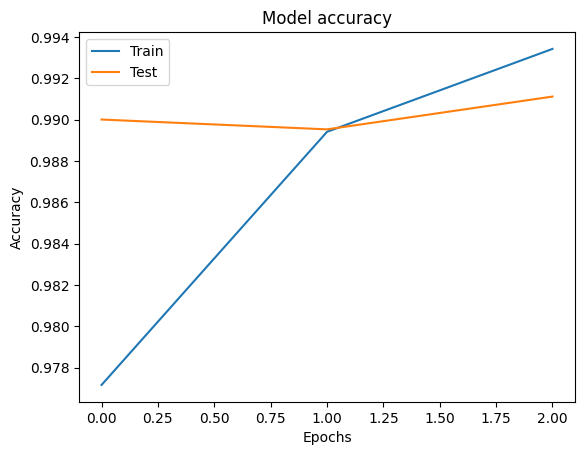

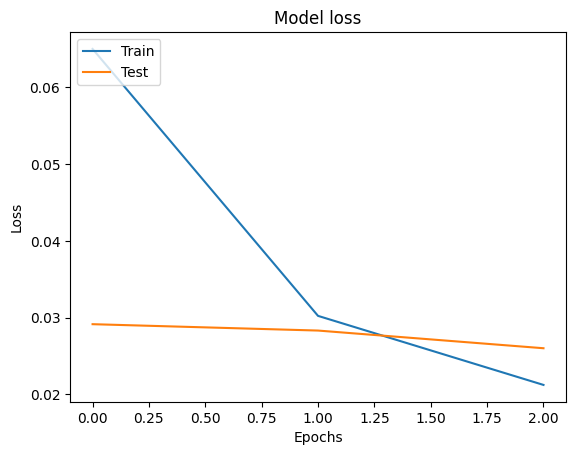

Model saved to xception_model.hdf5


In [28]:
# fit model
history = my_model.fit(
    train_it, 
    validation_data=test_it, 
    epochs=3,  # ปรับเป็นจำนวน epochs ที่ต้องการ
    verbose=1,
)

# evaluate model
_, acc = my_model.evaluate(test_it, verbose=1)  # ใช้ evaluate แทน evaluate_generator
print('> %.3f' % (acc * 100.0))

# learning curves
summarize_diagnostics(history)

# save model
best_model = 'xception_model.hdf5'  # เปลี่ยนชื่อไฟล์เป็นของ Xception
my_model.save(best_model)
print(f'Model saved to {best_model}')

Found 6303 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


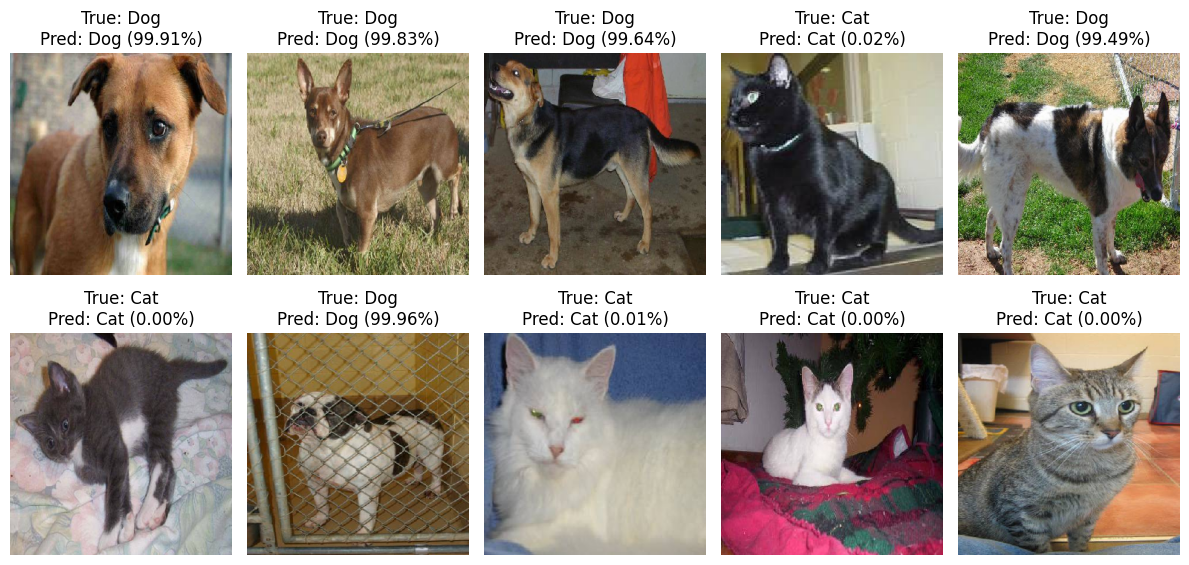

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# โหลดโมเดล Xception ที่ฝึกเสร็จแล้ว
model = load_model('xception_model.hdf5')  # เปลี่ยนเป็น path ของโมเดลที่เซฟไว้

# เตรียม ImageDataGenerator สำหรับ test set
test_datagen = ImageDataGenerator(rescale=1./255)

# โหลดข้อมูลจากโฟลเดอร์ test
test_it = test_datagen.flow_from_directory(
    'dataset_dogs_vs_cats/test/',  # โฟลเดอร์ test set
    class_mode='binary',
    batch_size=1,  # โหลดทีละ 1 รูป
    target_size=(299, 299),  # ปรับขนาดให้ตรงกับที่ Xception ต้องการ
    shuffle=True  # สุ่มลำดับของภาพ
)

# ดึงรูปจาก test set (สุ่ม 10 รูป คลาสละ 5 รูป)
num_samples = 10
selected_images = []
selected_labels = []

# จำนวนรูปที่ต้องการจากแต่ละคลาส
num_dogs = 0
num_cats = 0

# เลือกรูป 10 รูป โดย 5 รูปจากสุนัขและ 5 รูปจากแมว
while len(selected_images) < num_samples:
    img, label = next(test_it)  # ดึงรูปจาก test_it
    if label[0] == 1 and num_dogs < 5:  # เลือกสุนัข
        selected_images.append(img[0])  # ดึงภาพ
        selected_labels.append(label[0])  # ดึง label
        num_dogs += 1
    elif label[0] == 0 and num_cats < 5:  # เลือกแมว
        selected_images.append(img[0])  # ดึงภาพ
        selected_labels.append(label[0])  # ดึง label
        num_cats += 1

# แปลงข้อมูลภาพให้เป็น numpy array
selected_images = np.array(selected_images)

# ใช้โมเดลทำนาย
predictions = model.predict(selected_images)

# เปลี่ยนค่าผลลัพธ์จาก sigmoid ให้เป็น 0 หรือ 1
pred_labels = (predictions > 0.5).astype(int)

# แสดงผลลัพธ์
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(num_samples):
    axes[i].imshow(selected_images[i])  # แสดงรูปภาพ
    true_label = "Dog" if selected_labels[i] == 1 else "Cat"  # ป้ายจริง
    pred_label = "Dog" if pred_labels[i] == 1 else "Cat"  # ป้ายที่ทำนาย
    pred_confidence = predictions[i][0] * 100  # ความมั่นใจของการทำนาย
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label} ({pred_confidence:.2f}%)")  # แสดงผลลัพธ์
    axes[i].axis('off')

plt.tight_layout()  # ปรับการจัดตำแหน่งภาพ
plt.show()


# **InceptionV3**# # 

In [30]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from livelossplot import PlotLossesKeras

# โหลดโมเดล InceptionV3
model = InceptionV3(
    include_top=False, 
    input_shape=(299, 299, 3)  # ขนาดที่โมเดล InceptionV3 ต้องการ
)

# พิมพ์ summary ของโมเดล InceptionV3
print(model.summary())


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 149, 149, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 149, 149, 32)   │             96 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 147, 147, 32)   │             96 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 147, 147, 64)   │            192 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 73, 73, 80)     │            240 │ conv2d_7[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 71, 71, 192)    │            576 │ conv2d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

None


In [31]:
# mark loaded layers as not trainable (freeze layers)
for index, layer in enumerate(model.layers[:15]):
    if hasattr(layer, 'output_shape'):
        print(index, layer.name, layer.output_shape)
    layer.trainable = False

# unfreeze the remaining layers
for index, layer in enumerate(model.layers[15:]):
    if hasattr(layer, 'output_shape'):
        print(index, layer.name, layer.output_shape)
    layer.trainable = True


In [32]:
# เพิ่ม new classifier layers
flat1 = Flatten()(model.layers[-1].output)  # ใช้ output จากเลเยอร์สุดท้าย
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)  # ReLU และ He initializer
output = Dense(1, activation='sigmoid')(class1)  # Layer สุดท้ายสำหรับ binary classification

In [33]:
# define new model
my_model = Model(inputs=model.inputs, outputs=output)

# compile model
opt = SGD(learning_rate=0.0001, momentum=0.9)  # ใช้ learning_rate แทน lr
my_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# display model summary
my_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 149, 149, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 149, 149, 32)   │             96 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 149, 149, 32)   │              0 │ batch_normalization_4… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 147, 147, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_5     │ (None, 147, 147, 32)   │             96 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 147, 147, 32)   │              0 │ batch_normalization_5… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 147, 147, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 147, 147, 64)   │            192 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 147, 147, 64)   │              0 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 73, 73, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 73, 73, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 73, 73, 80)     │            240 │ conv2d_7[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 73, 73, 80)     │              0 │ batch_normalization_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 71, 71, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 71, 71, 192)    │            576 │ conv2d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 38,580,257 (147.17 MB)

 Trainable params: 38,373,745 (146.38 MB)

 Non-trainable params: 206,512 (806.69 KB)

In [34]:
# เตรียม ImageDataGenerator สำหรับการฝึก
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_it = train_datagen.flow_from_directory(
    'dataset_dogs_vs_cats/train/',  # โฟลเดอร์ train set
    class_mode='binary',
    batch_size=32,  # ปรับ batch size ตามที่ต้องการ
    target_size=(299, 299),  # ปรับขนาดให้ตรงกับที่ InceptionV3 ต้องการ
)

test_it = test_datagen.flow_from_directory(
    'dataset_dogs_vs_cats/test/',  # โฟลเดอร์ test set
    class_mode='binary',
    batch_size=32,  # ปรับ batch size ตามที่ต้องการ
    target_size=(299, 299),  # ปรับขนาดให้ตรงกับที่ InceptionV3 ต้องการ
)

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


Epoch 1/3
585/585 ━━━━━━━━━━━━━━━━━━━━ 353s 487ms/step - accuracy: 0.9301 - loss: 0.1601 - val_accuracy: 0.9851 - val_loss: 0.0401
Epoch 2/3
585/585 ━━━━━━━━━━━━━━━━━━━━ 229s 390ms/step - accuracy: 0.9910 - loss: 0.0295 - val_accuracy: 0.9843 - val_loss: 0.0365
Epoch 3/3
585/585 ━━━━━━━━━━━━━━━━━━━━ 229s 390ms/step - accuracy: 0.9935 - loss: 0.0189 - val_accuracy: 0.9876 - val_loss: 0.0283
197/197 ━━━━━━━━━━━━━━━━━━━━ 25s 127ms/step - accuracy: 0.9875 - loss: 0.0277
> 98.762


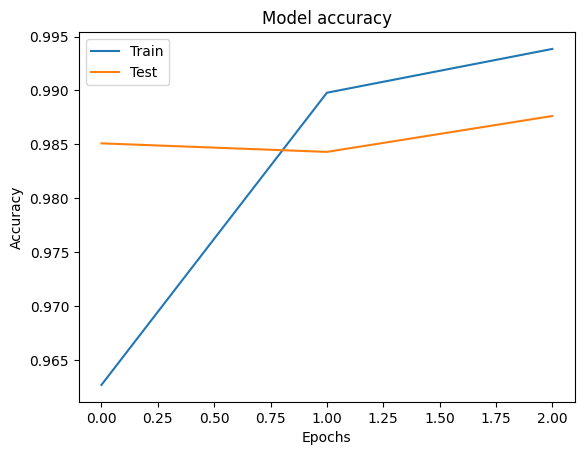

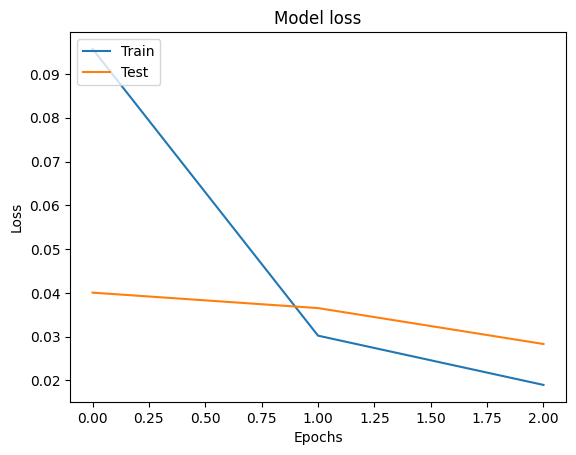

Model saved to inceptionv3_model.hdf5


In [35]:
# fit model
history = my_model.fit(
    train_it, 
    validation_data=test_it, 
    epochs=3,  # ปรับเป็นจำนวน epochs ที่ต้องการ
    verbose=1,
)

# evaluate model
_, acc = my_model.evaluate(test_it, verbose=1)  # ใช้ evaluate แทน evaluate_generator
print('> %.3f' % (acc * 100.0))

# learning curves
summarize_diagnostics(history)

# save model
best_model = 'inceptionv3_model.hdf5'  # เปลี่ยนชื่อไฟล์เป็นของ InceptionV3
my_model.save(best_model)
print(f'Model saved to {best_model}')

Found 6303 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


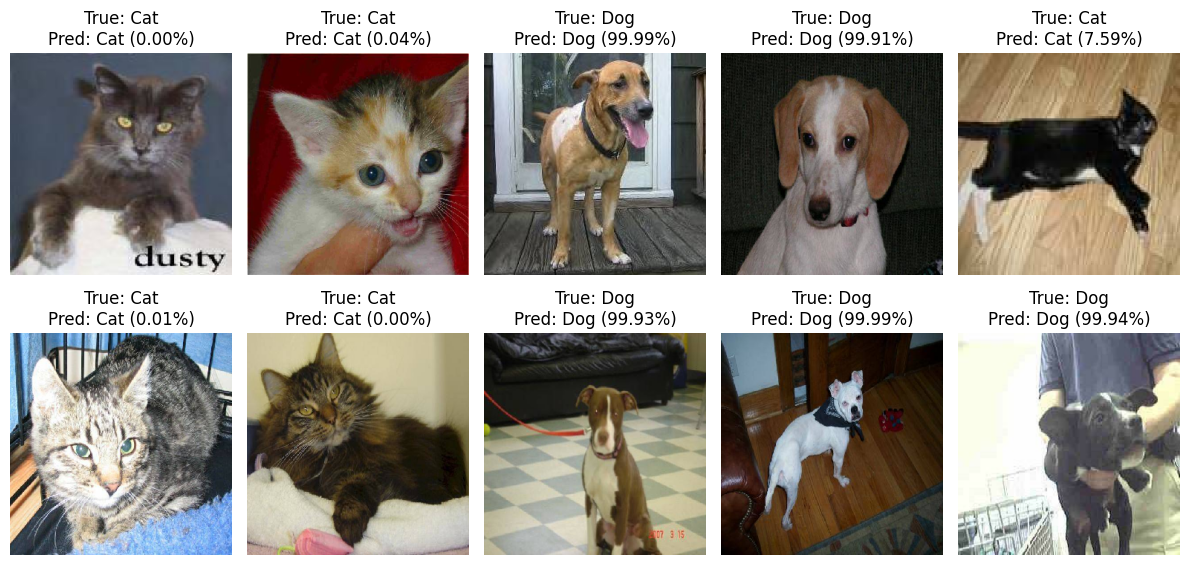

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# โหลดโมเดล InceptionV3 ที่ฝึกเสร็จแล้ว
model = load_model('inceptionv3_model.hdf5')  # เปลี่ยนเป็น path ของโมเดลที่เซฟไว้

# เตรียม ImageDataGenerator สำหรับ test set
test_datagen = ImageDataGenerator(rescale=1./255)

# โหลดข้อมูลจากโฟลเดอร์ test
test_it = test_datagen.flow_from_directory(
    'dataset_dogs_vs_cats/test/',  # โฟลเดอร์ test set
    class_mode='binary',
    batch_size=1,  # โหลดทีละ 1 รูป
    target_size=(299, 299),  # ปรับขนาดให้ตรงกับที่ InceptionV3 ต้องการ
    shuffle=True  # สุ่มลำดับของภาพ
)

# ดึงรูปจาก test set (สุ่ม 10 รูป คลาสละ 5 รูป)
num_samples = 10
selected_images = []
selected_labels = []

# จำนวนรูปที่ต้องการจากแต่ละคลาส
num_dogs = 0
num_cats = 0

# เลือกรูป 10 รูป โดย 5 รูปจากสุนัขและ 5 รูปจากแมว
while len(selected_images) < num_samples:
    img, label = next(test_it)  # ดึงรูปจาก test_it
    if label[0] == 1 and num_dogs < 5:  # เลือกสุนัข
        selected_images.append(img[0])  # ดึงภาพ
        selected_labels.append(label[0])  # ดึง label
        num_dogs += 1
    elif label[0] == 0 and num_cats < 5:  # เลือกแมว
        selected_images.append(img[0])  # ดึงภาพ
        selected_labels.append(label[0])  # ดึง label
        num_cats += 1

# แปลงข้อมูลภาพให้เป็น numpy array
selected_images = np.array(selected_images)

# ใช้โมเดลทำนาย
predictions = model.predict(selected_images)

# เปลี่ยนค่าผลลัพธ์จาก sigmoid ให้เป็น 0 หรือ 1
pred_labels = (predictions > 0.5).astype(int)

# แสดงผลลัพธ์
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(num_samples):
    axes[i].imshow(selected_images[i])  # แสดงรูปภาพ
    true_label = "Dog" if selected_labels[i] == 1 else "Cat"  # ป้ายจริง
    pred_label = "Dog" if pred_labels[i] == 1 else "Cat"  # ป้ายที่ทำนาย
    pred_confidence = predictions[i][0] * 100  # ความมั่นใจของการทำนาย
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label} ({pred_confidence:.2f}%)")  # แสดงผลลัพธ์
    axes[i].axis('off')

plt.tight_layout()  # ปรับการจัดตำแหน่งภาพ
plt.show()


# MobileNetV2

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# โหลด MobileNetV2 model โดยไม่รวม top layers
base_model = MobileNetV2(
    include_top=False,  # ลบ fully connected layer ที่ใช้ในการจำแนก
    input_shape=(224, 224, 3)  # ขนาดที่โมเดลต้องการ
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [38]:
# ทำให้ layer ของ base model ไม่สามารถฝึกได้ (freeze)
for layer in base_model.layers:
    layer.trainable = False

# เพิ่ม classifier layer สำหรับโมเดลที่ใช้กับงาน binary classification
x = Flatten()(base_model.output)  # แปลงข้อมูลเป็น 1D
x = Dense(128, activation='relu')(x)  # Dense layer แรก
x = Dense(1, activation='sigmoid')(x)  # สุดท้ายเป็น sigmoid สำหรับ binary classification (แมวหรือสุนัข)


In [39]:
# สร้างโมเดลใหม่โดยใช้ base model และ classifier ที่เราเพิ่ม
model = Model(inputs=base_model.input, outputs=x)

# คอมไพล์โมเดล
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [40]:
# เตรียม ImageDataGenerator สำหรับ train และ test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# โหลดข้อมูลการฝึกและการทดสอบ
train_it = train_datagen.flow_from_directory(
    'dataset_dogs_vs_cats/train/',  # เปลี่ยนเป็น path ของ train set
    class_mode='binary',
    batch_size=32,
    target_size=(224, 224)  # ขนาดที่โมเดลต้องการ
)

test_it = test_datagen.flow_from_directory(
    'dataset_dogs_vs_cats/test/',  # เปลี่ยนเป็น path ของ test set
    class_mode='binary',
    batch_size=32,
    target_size=(224, 224)  # ขนาดที่โมเดลต้องการ
)

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


Epoch 1/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 240s 390ms/step - accuracy: 0.9306 - loss: 0.1838 - val_accuracy: 0.9784 - val_loss: 0.0609
Epoch 2/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 221s 373ms/step - accuracy: 0.9610 - loss: 0.0969 - val_accuracy: 0.9746 - val_loss: 0.0781
Epoch 3/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 222s 375ms/step - accuracy: 0.9620 - loss: 0.0930 - val_accuracy: 0.9786 - val_loss: 0.0544
Epoch 4/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 222s 375ms/step - accuracy: 0.9631 - loss: 0.0890 - val_accuracy: 0.9797 - val_loss: 0.0584
Epoch 5/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 220s 372ms/step - accuracy: 0.9670 - loss: 0.0843 - val_accuracy: 0.9789 - val_loss: 0.0613
Epoch 6/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 223s 377ms/step - accuracy: 0.9686 - loss: 0.0765 - val_accuracy: 0.9772 - val_loss: 0.0603
Epoch 7/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 222s 375ms/step - accuracy: 0.9673 - loss: 0.0778 - val_accuracy: 0.9845 - val_loss: 0.0453
Epoch 8/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 222s 375ms/step - accuracy: 0.9713 -

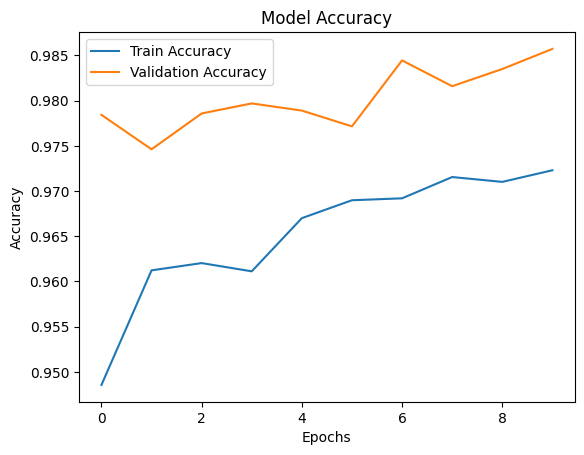

Model saved to 'mobilenetv2_model.hdf5'


In [41]:
# ฝึกโมเดล
history = model.fit(
    train_it,
    validation_data=test_it,
    epochs=10,  # ปรับจำนวน epochs ตามที่ต้องการ
    verbose=1
)

# ประเมินโมเดล
_, acc = model.evaluate(test_it, verbose=1)
print(f'Model Accuracy: {acc * 100:.2f}%')

# แสดงผลการฝึก
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# บันทึกโมเดลที่ฝึกเสร็จแล้ว
model.save('mobilenetv2_model.hdf5')
print("Model saved to 'mobilenetv2_model.hdf5'")

Found 6303 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


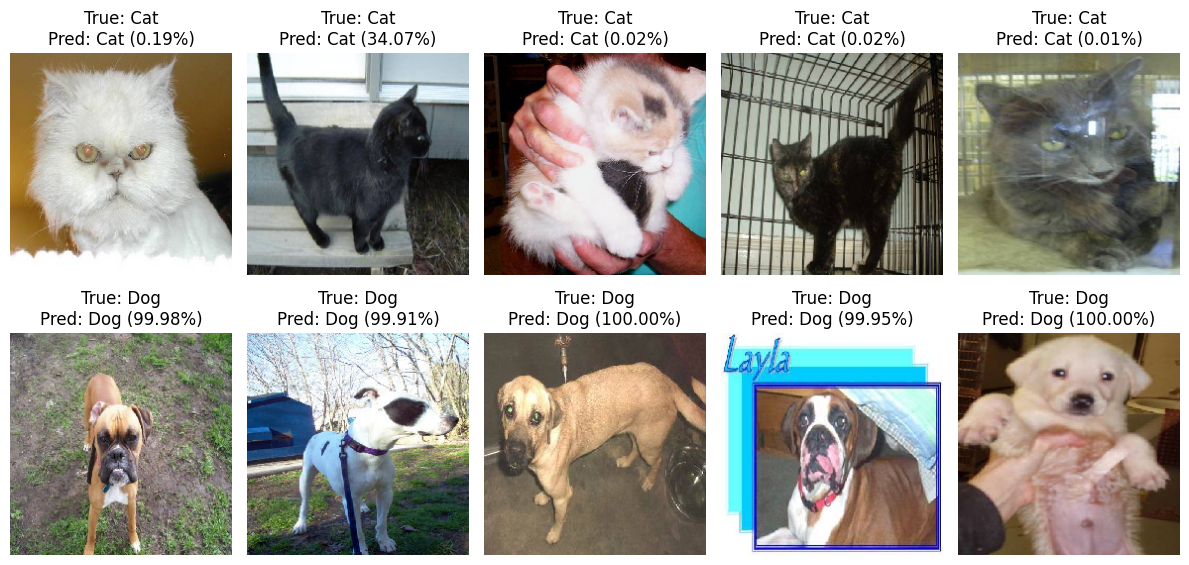

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import MobileNetV2

# โหลดโมเดล MobileNetV2 ที่ฝึกเสร็จแล้ว
model = load_model('mobilenetv2_model.hdf5')  # เปลี่ยนเป็น path ของโมเดลที่เซฟไว้

# เตรียม ImageDataGenerator สำหรับ test set
test_datagen = ImageDataGenerator(rescale=1./255)

# โหลดข้อมูลจากโฟลเดอร์ test
test_it = test_datagen.flow_from_directory(
    'dataset_dogs_vs_cats/test/',  # โฟลเดอร์ test set
    class_mode='binary',
    batch_size=1,  # โหลดทีละ 1 รูป
    target_size=(224, 224),  # ปรับขนาดให้ตรงกับที่ MobileNetV2 ต้องการ
    shuffle=True  # สุ่มลำดับของภาพ
)

# ดึงรูปจาก test set (สุ่ม 10 รูป คลาสละ 5 รูป)
num_samples = 10
selected_images = []
selected_labels = []

# จำนวนรูปที่ต้องการจากแต่ละคลาส
num_dogs = 0
num_cats = 0

# เลือกรูป 10 รูป โดย 5 รูปจากสุนัขและ 5 รูปจากแมว
while len(selected_images) < num_samples:
    img, label = next(test_it)  # ดึงรูปจาก test_it
    if label[0] == 1 and num_dogs < 5:  # เลือกสุนัข
        selected_images.append(img[0])  # ดึงภาพ
        selected_labels.append(label[0])  # ดึง label
        num_dogs += 1
    elif label[0] == 0 and num_cats < 5:  # เลือกแมว
        selected_images.append(img[0])  # ดึงภาพ
        selected_labels.append(label[0])  # ดึง label
        num_cats += 1

# แปลงข้อมูลภาพให้เป็น numpy array
selected_images = np.array(selected_images)

# ใช้โมเดลทำนาย
predictions = model.predict(selected_images)

# เปลี่ยนค่าผลลัพธ์จาก sigmoid ให้เป็น 0 หรือ 1
pred_labels = (predictions > 0.5).astype(int)

# แสดงผลลัพธ์
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(num_samples):
    axes[i].imshow(selected_images[i])  # แสดงรูปภาพ
    true_label = "Dog" if selected_labels[i] == 1 else "Cat"  # ป้ายจริง
    pred_label = "Dog" if pred_labels[i] == 1 else "Cat"  # ป้ายที่ทำนาย
    pred_confidence = predictions[i][0] * 100  # ความมั่นใจของการทำนาย
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label} ({pred_confidence:.2f}%)")  # แสดงผลลัพธ์
    axes[i].axis('off')

plt.tight_layout()  # ปรับการจัดตำแหน่งภาพ
plt.show()


# DenseNet121

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# โหลดโมเดล DenseNet121 โดยไม่รวม top layers (จะใช้ classifier ของตัวเอง)
base_model = DenseNet121(
    include_top=False,  # ลบ fully connected layers
    input_shape=(224, 224, 3)  # ขนาดที่โมเดลต้องการ
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [44]:
# ทำให้ layer ของ base model ไม่สามารถฝึกได้ (freeze)
for layer in base_model.layers:
    layer.trainable = False

# เพิ่ม classifier layer สำหรับโมเดลที่ใช้กับงาน binary classification
x = Flatten()(base_model.output)  # แปลงข้อมูลเป็น 1D
x = Dense(128, activation='relu')(x)  # Dense layer แรก
x = Dense(1, activation='sigmoid')(x)  # สุดท้ายเป็น sigmoid สำหรับ binary classification (แมวหรือสุนัข)

In [45]:
# สร้างโมเดลใหม่โดยใช้ base model และ classifier ที่เราเพิ่ม
model = Model(inputs=base_model.input, outputs=x)

# คอมไพล์โมเดล
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [46]:
# เตรียม ImageDataGenerator สำหรับ train และ test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# โหลดข้อมูลการฝึกและการทดสอบ
train_it = train_datagen.flow_from_directory(
    'dataset_dogs_vs_cats/train/',  # เปลี่ยนเป็น path ของ train set
    class_mode='binary',
    batch_size=32,
    target_size=(224, 224)  # ขนาดที่โมเดลต้องการ
)

test_it = test_datagen.flow_from_directory(
    'dataset_dogs_vs_cats/test/',  # เปลี่ยนเป็น path ของ test set
    class_mode='binary',
    batch_size=32,
    target_size=(224, 224)  # ขนาดที่โมเดลต้องการ
)

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


Epoch 1/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 281s 432ms/step - accuracy: 0.9427 - loss: 0.1635 - val_accuracy: 0.9856 - val_loss: 0.0383
Epoch 2/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 228s 385ms/step - accuracy: 0.9650 - loss: 0.0875 - val_accuracy: 0.9803 - val_loss: 0.0578
Epoch 3/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 228s 385ms/step - accuracy: 0.9661 - loss: 0.0837 - val_accuracy: 0.9870 - val_loss: 0.0359
Epoch 4/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 226s 382ms/step - accuracy: 0.9713 - loss: 0.0735 - val_accuracy: 0.9889 - val_loss: 0.0312
Epoch 5/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 227s 383ms/step - accuracy: 0.9713 - loss: 0.0724 - val_accuracy: 0.9857 - val_loss: 0.0346
Epoch 6/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 227s 384ms/step - accuracy: 0.9707 - loss: 0.0720 - val_accuracy: 0.9870 - val_loss: 0.0352
Epoch 7/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 228s 385ms/step - accuracy: 0.9721 - loss: 0.0664 - val_accuracy: 0.9881 - val_loss: 0.0288
Epoch 8/10
585/585 ━━━━━━━━━━━━━━━━━━━━ 227s 383ms/step - accuracy: 0.9734 -

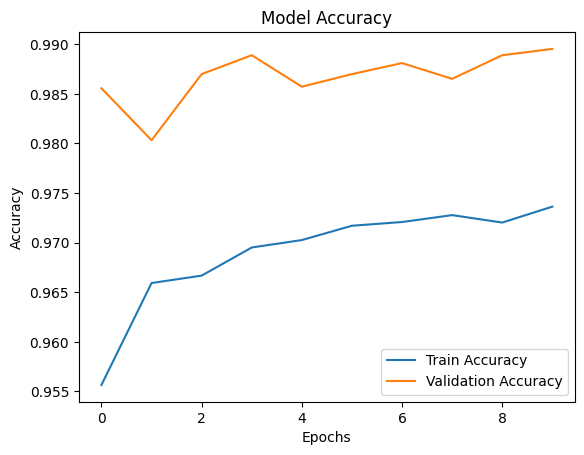

Model saved to 'densenet121_model.hdf5'


In [47]:
# ฝึกโมเดล
history = model.fit(
    train_it,
    validation_data=test_it,
    epochs=10,  # ปรับจำนวน epochs ตามที่ต้องการ
    verbose=1
)

# ประเมินโมเดล
_, acc = model.evaluate(test_it, verbose=1)
print(f'Model Accuracy: {acc * 100:.2f}%')

# แสดงผลการฝึก
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# บันทึกโมเดลที่ฝึกเสร็จแล้ว
model.save('densenet121_model.hdf5')
print("Model saved to 'densenet121_model.hdf5'")

Found 6303 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


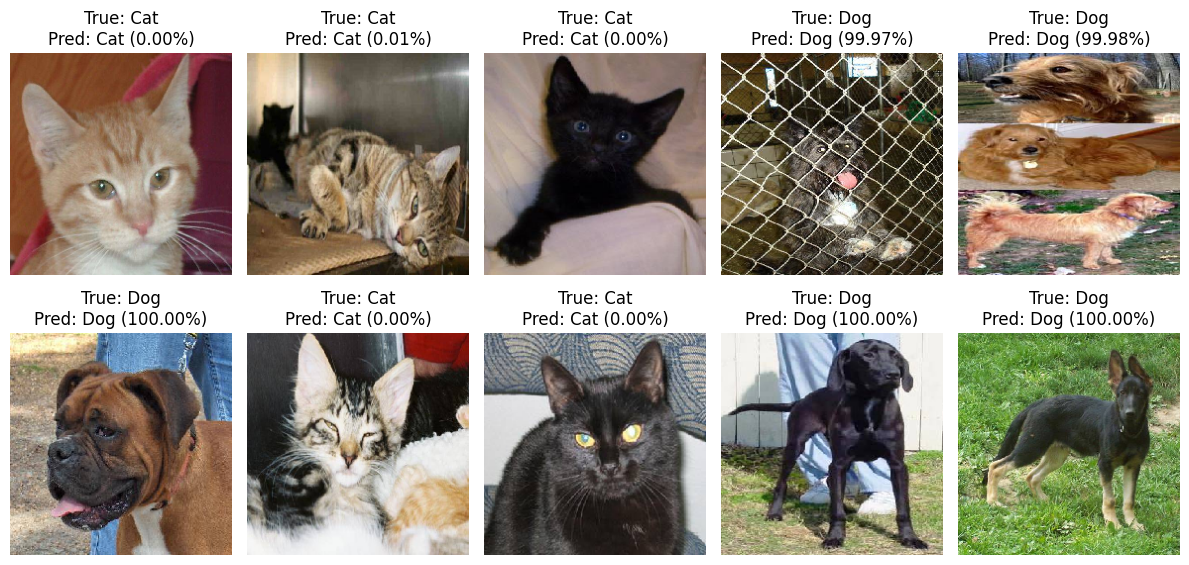

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import DenseNet121  # เปลี่ยนจาก MobileNetV2 เป็น DenseNet121

# โหลดโมเดล DenseNet121 ที่ฝึกเสร็จแล้ว
model = load_model('densenet121_model.hdf5')  # เปลี่ยนเป็น path ของโมเดลที่เซฟไว้

# เตรียม ImageDataGenerator สำหรับ test set
test_datagen = ImageDataGenerator(rescale=1./255)

# โหลดข้อมูลจากโฟลเดอร์ test
test_it = test_datagen.flow_from_directory(
    'dataset_dogs_vs_cats/test/',  # โฟลเดอร์ test set
    class_mode='binary',
    batch_size=1,  # โหลดทีละ 1 รูป
    target_size=(224, 224),  # ปรับขนาดให้ตรงกับที่ DenseNet121 ต้องการ
    shuffle=True  # สุ่มลำดับของภาพ
)

# ดึงรูปจาก test set (สุ่ม 10 รูป คลาสละ 5 รูป)
num_samples = 10
selected_images = []
selected_labels = []

# จำนวนรูปที่ต้องการจากแต่ละคลาส
num_dogs = 0
num_cats = 0

# เลือกรูป 10 รูป โดย 5 รูปจากสุนัขและ 5 รูปจากแมว
while len(selected_images) < num_samples:
    img, label = next(test_it)  # ดึงรูปจาก test_it
    if label[0] == 1 and num_dogs < 5:  # เลือกสุนัข
        selected_images.append(img[0])  # ดึงภาพ
        selected_labels.append(label[0])  # ดึง label
        num_dogs += 1
    elif label[0] == 0 and num_cats < 5:  # เลือกแมว
        selected_images.append(img[0])  # ดึงภาพ
        selected_labels.append(label[0])  # ดึง label
        num_cats += 1

# แปลงข้อมูลภาพให้เป็น numpy array
selected_images = np.array(selected_images)

# ใช้โมเดลทำนาย
predictions = model.predict(selected_images)

# เปลี่ยนค่าผลลัพธ์จาก sigmoid ให้เป็น 0 หรือ 1
pred_labels = (predictions > 0.5).astype(int)

# แสดงผลลัพธ์
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(num_samples):
    axes[i].imshow(selected_images[i])  # แสดงรูปภาพ
    true_label = "Dog" if selected_labels[i] == 1 else "Cat"  # ป้ายจริง
    pred_label = "Dog" if pred_labels[i] == 1 else "Cat"  # ป้ายที่ทำนาย
    pred_confidence = predictions[i][0] * 100  # ความมั่นใจของการทำนาย
    axes[i].set_title(f"True: {true_label}\nPred: {pred_label} ({pred_confidence:.2f}%)")  # แสดงผลลัพธ์
    axes[i].axis('off')

plt.tight_layout()  # ปรับการจัดตำแหน่งภาพ
plt.show()
